# Recommender systems

## Introduction

Recommender systems are among the most popular applications of data science today. They are used to predict the "rating" or "preference" that a user would give to an item. Almost every major tech company has applied them in some form. Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow.

What's more, for some companies like Netflix, Amazon Prime, Hulu, and Hotstar, the business model and its success revolves around the potency of their recommendations. Netflix even offered a million dollars in 2009 to anyone who could improve its system by 10%.

There are also popular recommender systems for domains like restaurants, courses, and online dating. Recommender systems have also been developed to explore research articles and experts, collaborators, and financial services. YouTube uses the recommendation system at a large scale to suggest you videos based on your history. For example, if you watch a lot of educational videos, it would suggest those types of videos.



Some really good read covering what we do in this class and even beyond ...
- [Recommender | Recommender Systems | Overview of systems](https://towardsdatascience.com/the-4-recommendation-engines-that-can-predict-your-course-tastes-109dc4e10c52) (19 min.) nicely explained with some code snippets.

Please watch the following videos (~60 min.): 
- [Recommender | Recommender Systems | Introduction](https://youtu.be/giIXNoiqO_U) (8 min.)Problem formulation
- [Recommender | Intro to Recommender Systems](https://youtu.be/gxXn9LDAdcU) (4 min.)
- [Recommender | Types of Recommender Systems](https://youtu.be/QRzfpJa3iJk) (3 min.)
- [Recommender | Content Based](https://youtu.be/IlqnNWuqToo) (21 min.) A bit long but solid foundations.
- [Recommender | Collaborative Filtering](https://youtu.be/3Sl_nFQbLQA) (21 min.).
- Alternatively, Go to Coursera and enroll on 'intro to recommender system'- it is **free when you select the 'audit course' option** and go to week3 'Content-Based Filtering Using TFIDF' [Recommender | Content-Based Filtering Using TFIDF](https://www.coursera.org/learn/recommender-systems-introduction/home/week/3) (3 x videos app.60 min.)

## But what are these recommender systems?

Broadly, recommender systems can be classified into 3 types:

- **Simple recommenders**: offer generalized recommendations to every user, based on course popularity and/or genre. The basic idea behind this system is that courses that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. An example could be IMDB Top 250.
- **Content-based recommenders**: suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for courses, to make these recommendations. The general idea behind these recommender systems is that if a person likes a particular item, he or she will also like an item that is similar to it. And to recommend that, it will make use of the user's past item metadata. A good example could be YouTube, where based on your history, it suggests you new videos that you could potentially watch.
- **Collaborative filtering engines**: these systems are widely used, and they try to predict the rating or preference that a user would give an item-based on past ratings and preferences of other users. Collaborative filters do not require item metadata like its content-based counterparts.±

#  1- Content Based Recommender 


In this tutorial, you will learn how to build a basic model of content-based recommender systems. While this model will be nowhere close to the industry standard in terms of complexity, quality, or accuracy, it will help you to get started with building more complex models that produce even better results.

Lets get started : Go the following link to download the dataset : 
https://www.kaggle.com/rounakbanik/the-courses-dataset

## The dataset : IMDB 250 Recommender systems
courses_metadata.csv: this file contains information on ~45,000 courses featured in the Full courseLens dataset. Features include posters, backdrops, budget, genre, revenue, release dates, languages, production countries, and companies.
Go the following link to download the dataset : 
https://www.kaggle.com/rounakbanik/the-courses-dataset

## Preparing the Data

In [33]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

df = pd.read_csv('course_061120.csv')
df.head()

,ID,Title,Description,Objectives,Solutions,Duration
0,d.4,Emotional Intelligence,<p>Emotional intelligence is the skill at perc...,<p>Here are the topics you will learn about by...,NaN,<p>2 hour 35 minutes</p>
1,d.5,Stress Management & Balance,<p>This is a self-learning program for learnin...,<p>At the end of this track you will be able t...,NaN,<p>48 minutes.</p>
2,d.6,Time Management & Productivity,<p>You'll learn strategies to better mangage y...,"<p>At the end of this, you will be able to:</p...",NaN,"<p>1 hour, 36 minutes</p>"
3,d.7,Public Speaking,"<p>In today’s business world, most of us need ...","<p>After studying the Public Speaking, you wil...",NaN,"<p>4 hours, 30 min</p>"
4,d.8,Virtual Team Communication,"<p><span style=""color: rgb(78, 78, 78);"">This ...",<p>Here are the topics you will learn about by...,NaN,<p>Maximum 5 hours.</p>


In [34]:
df.shape

(6204, 6)

We can see that we have data on 45,466 courses.

We also see that we have 24 columns. Each column represents a feature or a piece of metadata about the course. When we ran df.head(), we saw that most of the columns were truncated to fit in the display. To view all the columns (henceforth, called features) we have, we can run the following:

In [35]:
#Output the columns of df
df.columns

Index(['ID', 'Title', 'Description', 'Objectives', 'Solutions', 'Duration'], dtype='object')

From our output, it is quite clear which features we do and do not require. Now, let's reduce our DataFrame to only contain features that we need for our model:

In [36]:
#Only keep those features that we require 
df = df[['Title','Description', 'Objectives', 'Duration']]

df.head()

,Title,Description,Objectives,Duration
0,Emotional Intelligence,<p>Emotional intelligence is the skill at perc...,<p>Here are the topics you will learn about by...,<p>2 hour 35 minutes</p>
1,Stress Management & Balance,<p>This is a self-learning program for learnin...,<p>At the end of this track you will be able t...,<p>48 minutes.</p>
2,Time Management & Productivity,<p>You'll learn strategies to better mangage y...,"<p>At the end of this, you will be able to:</p...","<p>1 hour, 36 minutes</p>"
3,Public Speaking,"<p>In today’s business world, most of us need ...","<p>After studying the Public Speaking, you wil...","<p>4 hours, 30 min</p>"
4,Virtual Team Communication,"<p><span style=""color: rgb(78, 78, 78);"">This ...",<p>Here are the topics you will learn about by...,<p>Maximum 5 hours.</p>


In [37]:
def remove_html_tags(text):
    if pd.isna(text):
        return text
    return BeautifulSoup(text, "html.parser").get_text()

df['Title'] = df['Title'].apply(remove_html_tags)
df['Description'] = df['Description'].apply(remove_html_tags)
df['Objectives'] = df['Objectives'].apply(remove_html_tags)

/tmp/ipykernel_355925/1413256525.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


Next, let us extract the year of release from our release_date feature:

Our year feature is still an object and is riddled with NaT values, which are a type of null value used by Pandas. Let's convert these values to an integer, 0, and convert the datatype of the year feature into int.

To do this, we will define a helper function, convert_int, and apply it to the year feature:

We do not require the release_date feature anymore. So let's go ahead and remove it:

The runtime feature is already in a form that is usable. It doesn't require any additional wrangling. Let us now turn our attention to genres.

We can observe that the genres are in a format that looks like a JSON object (or a Python dictionary). Let us take a look at the genres object of one of our courses:

In [38]:
#Print the head of the cleaned DataFrame
df.head(10)

,Title,Description,Objectives,Duration
0,Emotional Intelligence,Emotional intelligence is the skill at perceiv...,Here are the topics you will learn about by ta...,<p>2 hour 35 minutes</p>
1,Stress Management & Balance,This is a self-learning program for learning s...,At the end of this track you will be able to:I...,<p>48 minutes.</p>
2,Time Management & Productivity,You'll learn strategies to better mangage your...,"At the end of this, you will be able to:use bo...","<p>1 hour, 36 minutes</p>"
3,Public Speaking,"In today’s business world, most of us need to ...","After studying the Public Speaking, you will:K...","<p>4 hours, 30 min</p>"
4,Virtual Team Communication,This curriculum addresses the challenges of wo...,Here are the topics you will learn about by ta...,<p>Maximum 5 hours.</p>
5,Interpersonal Communication,Good interpersonal communication skills help y...,Here are the topics you will learn about by ta...,<p>Maximum 4 hours.</p>
6,Cross Cultural Awareness and Communication,It is a field of study that looks at how peopl...,Here are the topics you will learn about by ta...,<p>Maximum 4 hours</p>
7,Software Engineering,The Software Engineering Community is a self-l...,Taking this learning program will allow you to...,<p>33:54 hours</p>
8,Problem Solving and Decision Making Fundamentals,In this community you will start by reviewing ...,These are the topics you will learn about by t...,<p>3 hour 52 minutes</p>
9,Web Programming,The Web Programming Community is a self-learni...,Discover and learn how to develop web applicat...,"Up to 17 hours, depending on your level of exp..."


##  Implementing the Content based recommender

In this section, you will learn how to build a system that recommends courses that are similar to a particular course.

Essentially, the models we are building compute the pairwise similarity between bodies of text. In our case we will use the course description and objectives to calculate the similarity between two courses and recommend courses based on that similarity score.

The challenge is that overview is text. Hence you need to extract some kind of features from the text data before you can compute the similarity and/or dissimilarity between them. This is done by representing each course as mathematical word vectors.

But what are the values of these vectors? The answer to that question depends on the vectorizer we are using to convert our documents into vectors. The two most popular vectorizers are CountVectorizer and TF-IDFVectorizer. We will be using TF-IDFVectorizer because some wordsoccur much more frequently in overview than others. It is therefore a good idea to assign weights to each word in a document according to the TF-IDF formula. **tfidf=term frequency/document frequency**

TF-IDF is used to searching and prioritizing important words in a document. Any word gets scored by tf-idf. Higher scores indicates core terms. In its essence, the TF-IDF score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that frequently occur in plot overviews and, therefore, their significance in computing the final similarity score.

Scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines.
- Import the Tfidf module using scikit-learn;
- Remove stop words like 'the', 'an', etc. since they do not give any useful information about the topic;
- Replace not-a-number values with a blank string;
- Finally, construct the TF-IDF matrix on the data.

Additionnaly you can watch this video on tfidf: https://youtu.be/6HuKFh0BatQ


In [39]:
#Import TfIdfVectorizer from the scikit-learn library
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['Title'] = df['Title'].fillna('')

#Replace NaN with an empty string
df['Description'] = df['Description'].fillna('')

#Replace NaN with an empty string
df['Objectives'] = df['Objectives'].fillna('')

df['text'] = df['Title'] + ' ' + df['Description'] + ' ' + df['Objectives']

#Construct the required TF-IDF matrix by applying the fit_transform method on the Description feature
tfidf_matrix = tfidf.fit_transform(df['text'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(6204, 23037)

/home/sylvester/micromamba/envs/ml5-challenge3/lib/python3.11/site-packages/umap/plot.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

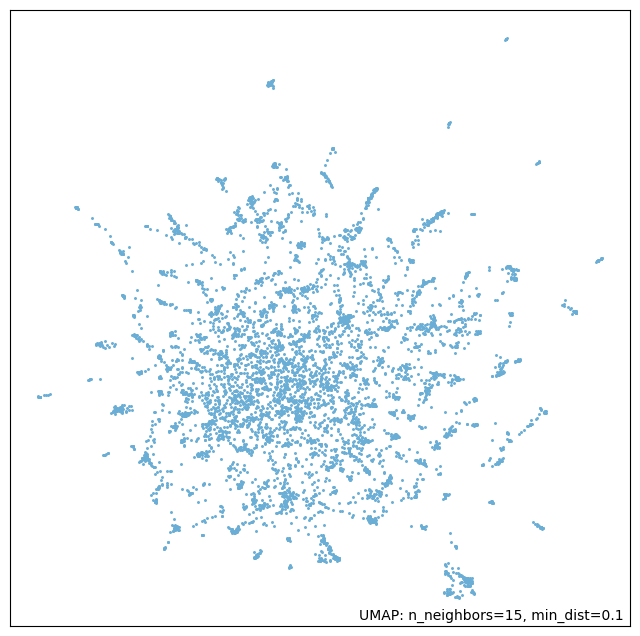

In [40]:
import pandas as pd
import numpy as np
import umap
import umap.plot

mapper = umap.UMAP().fit(tfidf_matrix)
umap.plot.points(mapper)

In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

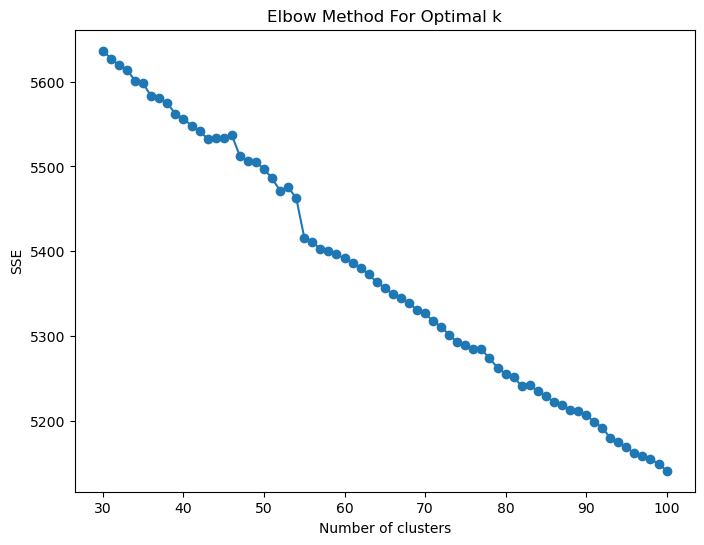

In [49]:
def plot_kmeans_elbow_method(matrix, max_k=100):
    sse = []
    k_values = range(30, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(tfidf_matrix)
        sse.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, sse, marker='o')  # Use k_values instead of range(1, max_k + 1)
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method For Optimal k')
    plt.show()

plot_kmeans_elbow_method(tfidf_matrix)

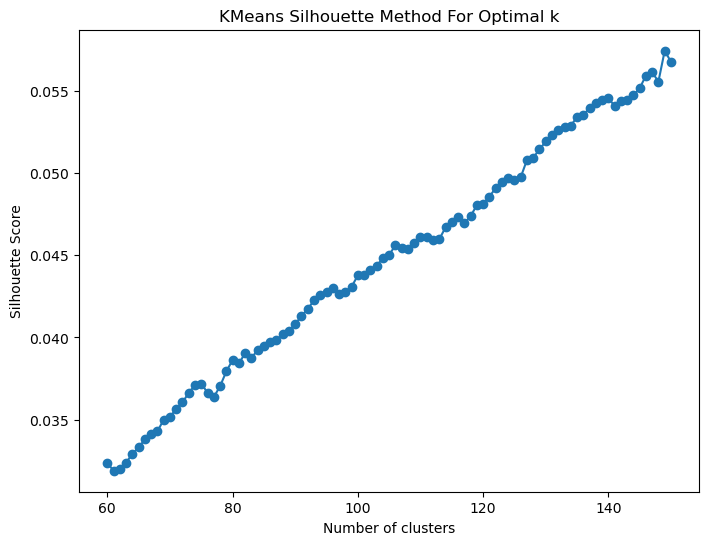

Optimal number of clusters: 149 with a silhouette score of 0.05746914060550906


In [54]:
def plot_kmeans_silhouette_method(matrix, max_k=150):
    silhouette_scores = []
    k_values = range(60, max_k + 1)
    best_k = 0
    best_score = -1
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(matrix)
        score = silhouette_score(matrix, kmeans.labels_)
        silhouette_scores.append(score)
        
        if score > best_score:
            best_score = score
            best_k = k
    
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('KMeans Silhouette Method For Optimal k')
    plt.show()
    
    print(f'Optimal number of clusters: {best_k} with a silhouette score of {best_score}')
    return best_k

best_k = plot_kmeans_silhouette_method(tfidf_matrix)

In [ ]:
k = 45
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_

hover_data = pd.DataFrame({'index': np.arange(len(df)),
                           'label': labels})
hover_data['Title'] = df['Title']

umap.plot.output_notebook()

p = umap.plot.interactive(mapper, labels=labels, hover_data=hover_data, point_size=5)
umap.plot.show(p)

Loading BokehJS ...